### The problem with constant values of weights is that in each epoch the values of weights will be same and they grow same rate. Because of that there are many nodes but they act has single node and only works as linear separable model.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense

In [8]:
X,y = make_moons(n_samples=500, noise=0.2, random_state=42)

In [9]:
X

array([[ 8.30857788e-01, -3.34342282e-01],
       [ 9.91709551e-01,  8.78999659e-01],
       [ 1.10724530e+00, -4.70343756e-01],
       [-1.40899180e-01,  1.03314844e+00],
       [ 4.05592166e-01,  1.32852876e+00],
       [ 1.28895069e+00, -5.24079834e-01],
       [ 1.12079473e+00, -2.72254126e-01],
       [ 1.06593729e-01,  1.21210782e+00],
       [ 5.20198504e-01,  5.82883348e-01],
       [ 1.70590095e+00, -3.33066121e-01],
       [ 1.01561986e+00,  2.73026004e-02],
       [-5.22698706e-01,  3.81315376e-01],
       [ 1.69803483e+00, -6.18298670e-01],
       [ 2.41387822e-01,  7.07334462e-01],
       [ 1.34611143e+00, -5.07042180e-01],
       [ 1.27539204e+00, -5.22307686e-01],
       [ 1.98071107e+00,  3.48378058e-01],
       [ 9.39366864e-01,  4.68451809e-01],
       [ 6.62788578e-01, -6.14652226e-01],
       [ 1.73235560e+00, -3.06407313e-01],
       [ 1.92000739e+00,  2.77147626e-01],
       [ 2.20364555e+00,  4.45032301e-01],
       [-2.36031096e-01,  2.03082090e-01],
       [ 9.

In [10]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,

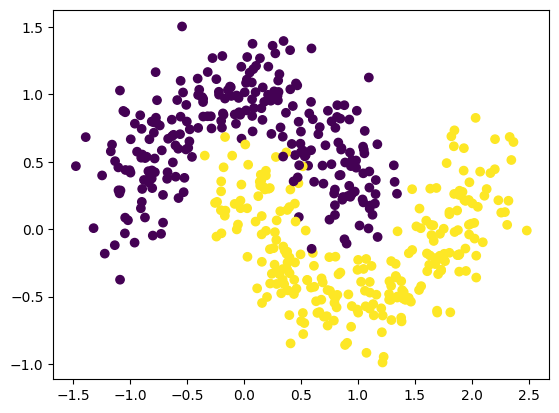

In [11]:
plt.scatter(X[:,0],X[:,1],c=y)

# Problem with Sigmoid

In [24]:
model = Sequential()

model.add(Dense(12,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
initial_weights = model.get_weights()

In [26]:
initial_weights

[array([[-0.27574062, -0.32005015, -0.61826277, -0.3865837 , -0.43641603,
          0.24292678,  0.6518011 , -0.53422797, -0.29077658,  0.40505314,
          0.5153307 , -0.3869372 ],
        [-0.43927372, -0.17314848, -0.14820713,  0.16755795, -0.6363403 ,
         -0.5822761 , -0.20464155,  0.01171237, -0.31851152, -0.25911248,
          0.25258654, -0.38814825]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-0.05910349],
        [-0.12152195],
        [ 0.17026722],
        [ 0.3166631 ],
        [-0.4114664 ],
        [-0.14832157],
        [-0.5680535 ],
        [-0.10193074],
        [-0.20470053],
        [-0.22287315],
        [ 0.10290468],
        [ 0.1578123 ]], dtype=float32),
 array([0.], dtype=float32)]

In [27]:
initial_weights[0] = np.ones(model.get_weights()[0].shape)*0.5
initial_weights[1]= np.ones(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.ones(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.ones(model.get_weights()[3].shape)*0.5

In [28]:
model.set_weights(initial_weights)

In [29]:
model.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
       dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [33]:
adam = Adam(learning_rate=0.01)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
history = model.fit(X,y, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4688 - loss: 2.3228 - val_accuracy: 0.5500 - val_loss: 1.5134
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4530 - loss: 1.6764 - val_accuracy: 0.5500 - val_loss: 1.0423
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4996 - loss: 1.0491 - val_accuracy: 0.5500 - val_loss: 0.7646
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5041 - loss: 0.7712 - val_accuracy: 0.5500 - val_loss: 0.6765
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4912 - loss: 0.6971 - val_accuracy: 0.5500 - val_loss: 0.6795
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5336 - loss: 0.6809 - val_accuracy: 0.5500 - val_loss: 0.6809
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5139 - loss: 0.6831 - val_accuracy: 0.5500 - val_loss: 0.6777
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4589 - loss: 0.6874 - val_accuracy: 0.5500 - val_loss

In [35]:
model.get_weights()

[array([[ 0.86744076,  0.86744076,  0.86744076,  0.86744076,  0.86744076,
          0.86744076,  0.86744076,  0.86744076,  0.86744076,  0.86744076,
          0.86744076,  0.86744076],
        [-2.4537024 , -2.4537024 , -2.4537024 , -2.4537024 , -2.4537024 ,
         -2.4537024 , -2.4537024 , -2.4537024 , -2.4537024 , -2.4537024 ,
         -2.4537024 , -2.4537024 ]], dtype=float32),
 array([-0.82838196, -0.82838196, -0.82838196, -0.82838196, -0.82838196,
        -0.82838196, -0.82838196, -0.82838196, -0.82838196, -0.82838196,
        -0.82838196, -0.82838196], dtype=float32),
 array([[0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311],
        [0.5640311]], dtype=float32),
 array([-2.0611672], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

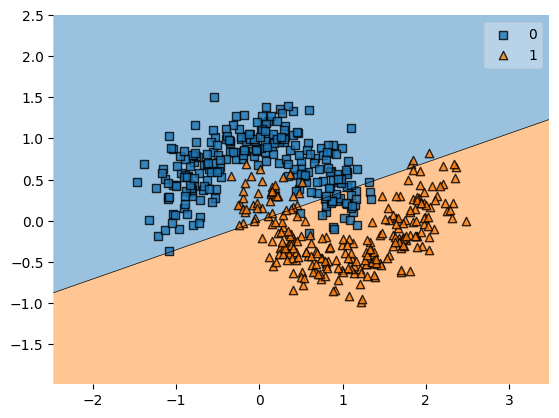

In [36]:
plot_decision_regions(X,y,clf=model)

# Problem with Tanh

In [37]:
model1 = Sequential()

model1.add(Dense(12,activation='tanh',input_dim=2))
model1.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
initial_weights1 = model1.get_weights()

In [39]:
initial_weights1

[array([[-0.3340691 ,  0.1735729 ,  0.27141136,  0.52944684,  0.22074932,
          0.44383395, -0.18706426, -0.25136724, -0.6217874 ,  0.38938522,
         -0.22985154, -0.30902144],
        [-0.64367896,  0.32190925, -0.02625436,  0.44499695,  0.23536092,
         -0.32197276, -0.4150322 , -0.5671017 , -0.1389162 ,  0.4991697 ,
         -0.38553748,  0.39471698]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.5985272 ],
        [-0.5393892 ],
        [-0.33868665],
        [-0.48135036],
        [ 0.36569524],
        [-0.61669946],
        [-0.19150373],
        [ 0.47887397],
        [ 0.4665661 ],
        [-0.65163034],
        [ 0.2499305 ],
        [ 0.20859683]], dtype=float32),
 array([0.], dtype=float32)]

In [40]:
initial_weights1[0] = np.ones(model1.get_weights()[0].shape)*0.5
initial_weights1[1]= np.ones(model1.get_weights()[1].shape)*0.5
initial_weights1[2] = np.ones(model1.get_weights()[2].shape)*0.5
initial_weights1[3] = np.ones(model1.get_weights()[3].shape)*0.5

In [41]:
model1.set_weights(initial_weights1)

In [42]:
model1.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
       dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [43]:
adam = Adam(learning_rate=0.01)
model1.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [44]:
history1 = model1.fit(X,y, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5093 - loss: 1.9259 - val_accuracy: 0.5800 - val_loss: 1.2724
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5727 - loss: 1.2165 - val_accuracy: 0.6100 - val_loss: 0.8338
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6073 - loss: 0.8780 - val_accuracy: 0.6800 - val_loss: 0.6441
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6563 - loss: 0.6574 - val_accuracy: 0.7300 - val_loss: 0.5993
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6549 - loss: 0.6301 - val_accuracy: 0.7200 - val_loss: 0.5872
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6592 - loss: 0.6146 - val_accuracy: 0.7300 - val_loss: 0.5639
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7127 - loss: 0.5711 - val_accuracy: 0.7600 - val_loss: 0.5344
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7627 - loss: 0.5090 - val_accuracy: 0.7700 - val_

In [45]:
model1.get_weights()

[array([[ 0.20286025,  0.20286025,  0.20286025,  0.20286025,  0.20286025,
          0.20286025,  0.20286025,  0.20286025,  0.20286025,  0.20286025,
          0.20286025,  0.20286025],
        [-0.79059654, -0.79059654, -0.79059654, -0.79059654, -0.79059654,
         -0.79059654, -0.79059654, -0.79059654, -0.79059654, -0.79059654,
         -0.79059654, -0.79059654]], dtype=float32),
 array([0.09475987, 0.09475987, 0.09475987, 0.09475987, 0.09475987,
        0.09475987, 0.09475987, 0.09475987, 0.09475987, 0.09475987,
        0.09475987, 0.09475987], dtype=float32),
 array([[0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683],
        [0.55160683]], dtype=float32),
 array([-0.12080348], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

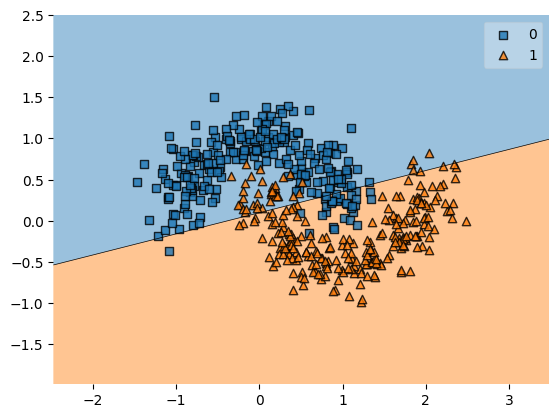

In [46]:
plot_decision_regions(X,y,clf=model1)

# Problem with Relu

In [47]:
model2 = Sequential()

model2.add(Dense(12,activation='relu',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
initial_weights2 = model2.get_weights()

In [49]:
initial_weights2

[array([[ 0.27022249, -0.27340767,  0.08259916,  0.37078023,  0.15428883,
         -0.5833339 , -0.64058447, -0.15443039,  0.01295352,  0.3329422 ,
         -0.63829947, -0.3862539 ],
        [-0.02126551,  0.03388232, -0.36248094, -0.11539453, -0.05396944,
          0.35369074,  0.6444633 ,  0.32865697, -0.6088392 ,  0.21289623,
          0.30323642, -0.05820578]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.34667945],
        [ 0.08885688],
        [-0.31127733],
        [ 0.02833176],
        [ 0.51913226],
        [-0.50257486],
        [ 0.66000843],
        [-0.5409085 ],
        [ 0.631292  ],
        [-0.32908404],
        [ 0.554466  ],
        [ 0.42985165]], dtype=float32),
 array([0.], dtype=float32)]

In [50]:
initial_weights2[0] = np.ones(model2.get_weights()[0].shape)*0.5
initial_weights2[1]= np.ones(model2.get_weights()[1].shape)*0.5
initial_weights2[2] = np.ones(model2.get_weights()[2].shape)*0.5
initial_weights2[3] = np.ones(model2.get_weights()[3].shape)*0.5

In [51]:
model2.set_weights(initial_weights2)

In [52]:
model2.get_weights()

[array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
        [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
       dtype=float32),
 array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       dtype=float32),
 array([[0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5],
        [0.5]], dtype=float32),
 array([0.5], dtype=float32)]

In [53]:
adam = Adam(learning_rate=0.01)
model2.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history2 = model2.fit(X,y, epochs=50, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4830 - loss: 2.6564 - val_accuracy: 0.5500 - val_loss: 1.5144
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4797 - loss: 1.5865 - val_accuracy: 0.5500 - val_loss: 0.9362
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4933 - loss: 0.9129 - val_accuracy: 0.5500 - val_loss: 0.7038
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4729 - loss: 0.7535 - val_accuracy: 0.5500 - val_loss: 0.6429
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4643 - loss: 0.6808 - val_accuracy: 0.7000 - val_loss: 0.6286
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6620 - loss: 0.6530 - val_accuracy: 0.7300 - val_loss: 0.6190
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6334 - loss: 0.6480 - val_accuracy: 0.7200 - val_loss: 0.6047
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 0.6133 - val_accuracy: 0.7400 - val_loss

In [55]:
model2.get_weights()

[array([[ 0.20890139,  0.20890139,  0.20890139,  0.20890139,  0.20890139,
          0.20890139,  0.20890139,  0.20890139,  0.20890139,  0.20890139,
          0.20890139,  0.20890139],
        [-0.72622377, -0.72622377, -0.72622377, -0.72622377, -0.72622377,
         -0.72622377, -0.72622377, -0.72622377, -0.72622377, -0.72622377,
         -0.72622377, -0.72622377]], dtype=float32),
 array([0.4061024, 0.4061024, 0.4061024, 0.4061024, 0.4061024, 0.4061024,
        0.4061024, 0.4061024, 0.4061024, 0.4061024, 0.4061024, 0.4061024],
       dtype=float32),
 array([[0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892],
        [0.5253892]], dtype=float32),
 array([-2.0967927], dtype=float32)]

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

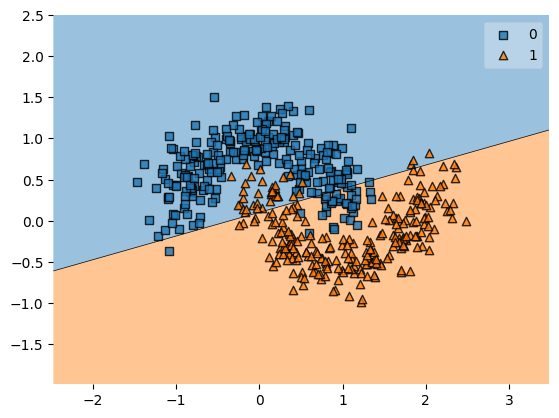

In [56]:
plot_decision_regions(X,y,clf=model2)